In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/data/katie_kang/trlx/examples/wandb/run-20240109_064009-dn22hcd7/files/media/table/"

In [3]:
with open(path+"samples_999_54232cadd99872d9b239.table.json") as f:
    data = json.load(f)

In [58]:
num_facts = []
for row in data["data"]:
    prompt = row[0]
    if "<unk> " in prompt:
        prompt = prompt.split("<unk> ")[-1]
    print(prompt)
    print(row[1])
    print(len(row[1].split("\n")))
    num_facts.append(len(row[1].split("\n")))
    print("")

Dead Child was an American rock band from New York City, formed in 1999.
 Fact 1: Dead Child was an American rock band.
Fact 2: Dead Child was from New York City.
Fact 3: Dead Child was formed in 1999.
3

Velusami Radhakrishnan was an Indian politician and former Member of the Legislative Assembly of Tamil Nadu.
 Fact 1: Velusami Radhakrishnan was an Indian politician.
Fact 2: Velusami Radhakrishnan was a former Member of the Legislative Assembly.
Fact 3: Velusami Radhakrishnan was a former Member of the Legislative Assembly of Tamil Nadu.
3

Gentian Stojku is a retired Albanian football player.
 Fact 1: Gentian Stojku is retired.
Fact 2: Gentian Stojku is Albanian.
Fact 3: Gentian Stojku is a football player.
3

Diego Herner is a German former professional footballer who played as a midfielder.
 Fact 1: Diego Herner is German.
Fact 2: Diego Herner is a professional footballer.
Fact 3: Diego Herner played as a midfielder.
3

Mbali Ntuli is a South African actress.
 Fact 1: Mbali Ntuli 

In [9]:
facts_all = []
facts_idxs = []
for i, row in enumerate(data["data"]):
    facts = (row[1].split("\n"))
    for fact in facts:
        try:
            prefix = fact.split(": ")[0]
            fact = fact[len(prefix)+2:]
            facts_all.append(fact)
            facts_idxs.append(i)
        except:
            print(fact)

In [10]:
facts_idxs

[0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 26,
 26,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 29,
 29,
 30,
 30,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 34,
 35,
 35,
 36,
 36,
 36,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 40,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 45,
 45,
 45,
 46,
 46,
 47,
 47,
 47,
 47,
 48,
 48,
 48,
 49,
 49,
 49,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 53,
 53,
 53,
 54,
 54,
 54,
 55,
 55,
 55,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 58,
 58,
 59,
 59,
 59,
 60,
 60,
 61,
 61,
 61,
 62,
 62,
 63,
 63,
 63,
 64,
 64,
 64,
 65,
 65,
 65,
 66,
 66,
 67,
 67,
 67,
 68,
 68,
 68,
 69,
 69,
 69,
 70,
 70,
 70,
 70,

In [59]:

with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_small.json", "r") as f:
    factscores = json.load(f)

num_true_all = []
num_total_all = []
skipped_idxs = []
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        skipped_idxs.append(i)
    else:
        num_total_all.append(len(decison))
        num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))

In [62]:
num_facts_noisy = np.array(num_facts)+ np.random.normal(0, 0.2, len(num_facts))
num_total_all_noisy = np.array(num_total_all)+ np.random.normal(0, 0.2, len(num_true_all))

In [63]:
abs(num_facts_noisy - num_total_all_noisy).mean()

0.48657606197805153

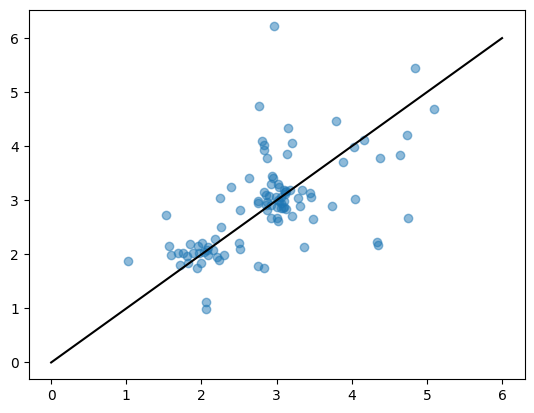

In [64]:
plt.scatter(num_total_all_noisy, num_facts_noisy, alpha=0.5)
plt.plot([0, 6], [0, 6], color="black")

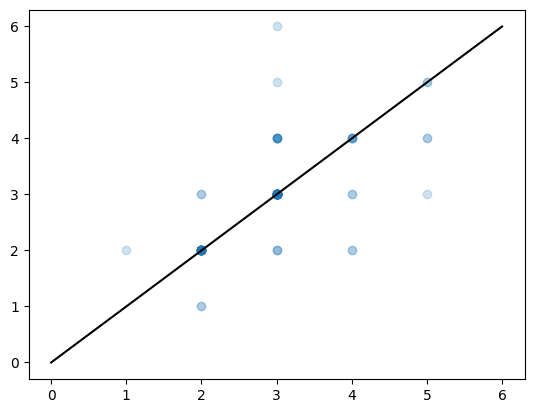

In [66]:
plt.scatter(num_total_all, num_facts, alpha=0.2)
plt.plot([0, 6], [0, 6], color="black")